In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

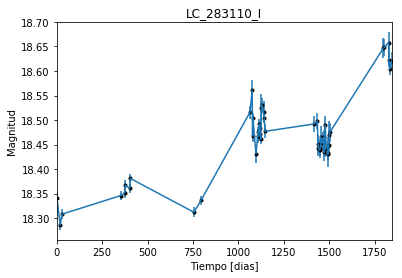

In [2]:
data = np.genfromtxt('LC_283110_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_283110_I')
plt.savefig("LC_283110_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

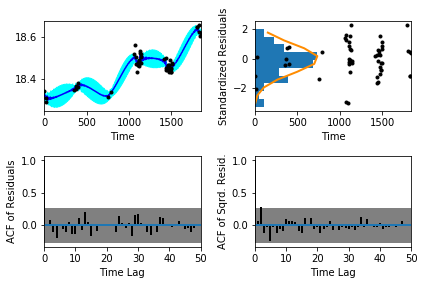

In [5]:
sample.assess_fit()

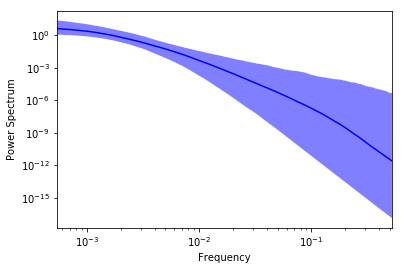

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

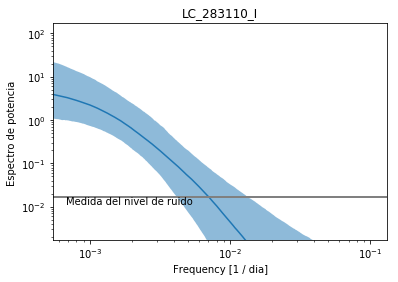

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_283110_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_283110_I')

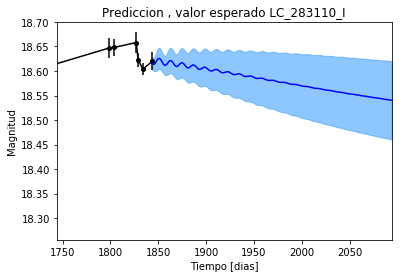

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_283110_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_283110_I')

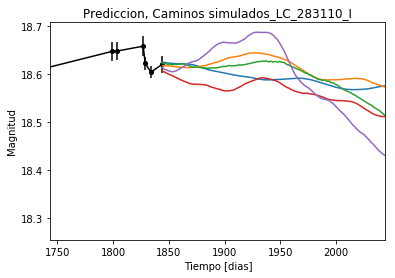

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_283110_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


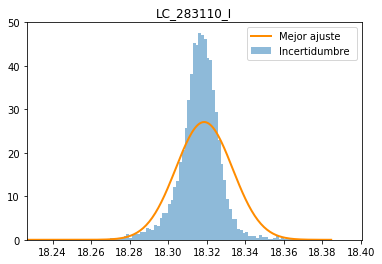

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_283110_I')
plt.savefig("Mejor_ajuste_LC_283110_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_283110_I')

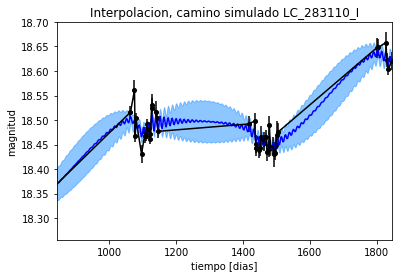

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_I')

Text(0.5,1,'Interpolacion, camino simulado LC_283110_I')

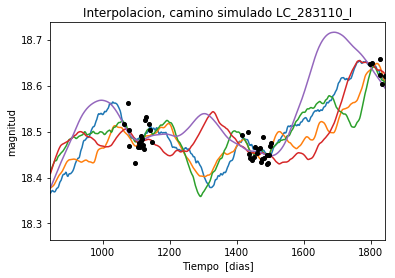

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1678.30868957
Median: 0.0198328989975
Standard deviation: 0.21083684918
68% credibility interval: [ 0.00194568  0.2364102 ]
95% credibility interval: [  6.74551633e-04   8.03751408e-01]
99% credibility interval: [  5.62032269e-04   9.87258330e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 674.569192505
Median: 0.00312965116592
Standard deviation: 0.0948704803754
68% credibility interval: [ 0.0008444   0.04246154]
95% credibility interval: [ 0.00057405  0.28094756]
99% credibility interval: [  5.46388887e-04   7.14460802e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 685.006799934
Median: 0.0219320431582
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 965.655313088
Median: 130.991654391
Standard deviation: 1.61026302518
68% credibility interval: [ 129.21163395  132.1691737 ]
95% credibility interval: [ 126.8559627  133.176544 ]
99% credibility interval: [ 125.09148057  133.85759572]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2673.08256978
Median: 0.810962525486
Standard deviation: 2.26714483528
68% credibility interval: [ 0.080137    4.06063961]
95% credibility interval: [ 0.02488033  7.68067496]
99% credibility interval: [  0.01759168  11.39096598]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 862.028785915
Median: 0.618152847313
Standard deviation: 9.43310601563
68% credibility interval: [ 0.03937651  8.0384685 ]
95% credibility interval: [  3.41372506e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10942.5547265
Median: 2.64129659243e-50
Standard deviation: 3.7505385466e+71
68% credibility interval: [  9.16442397e-102   5.27693245e-017]
95% credibility interval: [  6.05492297e-151   1.17360788e+000]
99% credibility interval: [  6.00995390e-157   7.20893347e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2530.84554353
Median: 18.4441563456
Standard deviation: 0.0654773470796
68% credibility interval: [ 18.39029516  18.49936394]
95% credibility interval: [ 18.31210813  18.57812287]
99% credibility interval: [ 18.24023925  18.6560964 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 623.316810847
Median: 0.011953460859
Standard deviation: 0.239073961157
68% credibility interval: [ 0.          0.33127268]
95% credibility interval: [ 0.          0.89623605]
99% credibility interval: [ 0.          1.00011547]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 623.316810847
Median: 0.011953460859
Standard deviation: 0.239073961157
68% credibility interval: [ 0.          0.33127268]
95% credibility interval: [ 0.          0.89623605]
99% credibility interval: [ 0.          1.00011547]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 661.921407855
Median: 0.0
Standard deviation: 0.000497573491585
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 965.655313088
Median: 130.991654391
Standard deviation: 1.61026302518
68% credibility interval: [ 129.21163395  132.1691737 ]
95% credibility interval: [ 126.8559627  133.176544 ]
99% credibility interval: [ 125.09148057  133.85759572]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1540.41694905
Median: 0.0130531384624
Standard deviation: 0.0160221332665
68% credibility interval: [ 0.00762339  0.0259838 ]
95% credibility interval: [ 0.00498038  0.0570992 ]
99% credibility interval: [ 0.00383593  0.10879223]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 952.888574065
Median: 1.3858887941
Standard deviation: 0.241061403978
68% credibility interval: [ 1.14586695  1.62891667]
95% credibility interval: [ 0.91808043  1.87939405]
99% credibility interval: [ 0.78217309  1.97069113]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 734.870574883
Median: 0.0001776642384
Standard deviation: 0.123897800419
68% credibility interval: [  7.15431673e-06   6.29409631e-03]
95% credibility interval: [  4.18304864e-07   2.80583660e-01]
99% credibility interval: [  6.19091489e-08   8.87953696e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1678.30868957
Median: (-0.12461377958-0.514240453246j)
Standard deviation: 2.00283404491
68% credibility interval: [-1.48540912+0.j         -0.01222505-0.01043441j]
95% credibility interval: [ -5.05011904e+00+0.j        -4.23833291e-03-0.015634j]
99% credibility interval: [ -6.20312703e+00+0.j          -3.53135289e-03-2.67278342j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 674.569192505
Median: (-0.0196641782223+0.106458056398j)
Standard deviation: 1.61609544056
68% credibility interval: [-0.26679370+0.21221352j -0.00530554+0.01205982j]
95% credibility interval: [-1.76524561+3.6928485j -0.00360689+0.j       ]
99% credibility interval: [ -4.48908961e+00+3.24727929j  -3.43306263e-03+0.j        ]
Posterior summary fo